In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Try to access data folder**

In [12]:
import glob

name_folders=glob.glob('/content/gdrive/My Drive/PyTorch_RNN/names/*.txt')
print(name_folders)
print("The number of class: ",len(name_folders))

['/content/gdrive/My Drive/PyTorch_RNN/names/Russian.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Irish.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Spanish.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Korean.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Greek.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/English.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Dutch.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Polish.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Japanese.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Italian.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Czech.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Scottish.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Chinese.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/German.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Vietnamese.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/French.txt', '/content/gdrive/My Drive/PyTorch_RNN/names/Arabic.txt', '/content/gdrive/My D

# **Convert Name from Unicode type to ASCII . **
 This will eliminate diacritics in the words. For example , with the name "Béringer" in French -> "Beringer"**

In [13]:
import unicodedata
import string


all_letters=string.ascii_letters + ".,;'"
print(all_letters)
print(len(all_letters))

def  unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD',s) if unicodedata.category(c) != 'Mn' and c in all_letters)

print(unicode_to_ascii("Béringer"))
print(unicode_to_ascii("Hiếu"))

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;'
56
Beringer
Hieu


# **Create a dictionary with a list name for each language (class)**

In [14]:
category_languages={}
all_categories=[]

#Đọc và chuyển tên mỗi dòng trong một file txt thành một tên theo các kí tự ascii (strip để loại bỏ những khoảng trống thừa)
def readLines(filename):
  lines=open(filename).read().strip().split("\n")
  return [unicode_to_ascii(line) for line in lines]

for filename in name_folders:
  category=filename.split('/')[-1].split('.')[0] # để đọc mỗi cái tên thày vì cả tên file kèm .txt
  all_categories.append(category)
  languages=readLines(filename)
  category_languages[category]=languages

print(all_categories)
print("The number of class : ",len(all_categories))
print(category_languages['Vietnamese'])


['Russian', 'Irish', 'Spanish', 'Korean', 'Greek', 'English', 'Dutch', 'Polish', 'Japanese', 'Italian', 'Czech', 'Scottish', 'Chinese', 'German', 'Vietnamese', 'French', 'Arabic', 'Portuguese']
The number of class :  18
['Nguyen', 'Tron', 'Le', 'Pham', 'Huynh', 'Hoang', 'Phan', 'Vu', 'Vo', 'Dang', 'Bui', 'Do', 'Ho', 'Ngo', 'Duong', 'Ly', 'An', 'an', 'Bach', 'Banh', 'Cao', 'Chau', 'Chu', 'Chung', 'Chu', 'Diep', 'Doan', 'Dam', 'Dao', 'Dinh', 'Doan', 'Giang', 'Ha', 'Han', 'Kieu', 'Kim', 'La', 'Lac', 'Lam', 'Lieu', 'Luc', 'Luong', 'Luu', 'Ma', 'Mach', 'Mai', 'Nghiem', 'Phi', 'Pho', 'Phung', 'Quach', 'Quang', 'Quyen', 'Ta', 'Thach', 'Thai', 'Sai', 'Thi', 'Than', 'Thao', 'Thuy', 'Tieu', 'To', 'Ton', 'Tong', 'Trang', 'Trieu', 'Trinh', 'Truong', 'Van', 'Vinh', 'Vuong', 'Vuu']


# **Turning names into PyTorch tensors**

In [15]:
import torch

n_letters=len(all_letters) #=56 

def letter_to_tensor(letter):
  tensor=torch.zeros(1,n_letters)
  letter_index=all_letters.find(letter)
  tensor[0][letter_index]=1
  return tensor

def line_to_tensor(line):
  tensor=torch.zeros(len(line),1,n_letters)
  for idx,letter in enumerate(line):
    letter_index=all_letters.find(letter)
    tensor[idx][0][letter_index]=1
  return tensor

print("One hot for character H:\n" ,letter_to_tensor("H"),letter_to_tensor("H").shape) #1x56
print("One hot for name 'Hieu' :\n ", line_to_tensor("Hieu"),line_to_tensor("Hieu").shape) #4x1x56



One hot for character H:
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]]) torch.Size([1, 56])
One hot for name 'Hieu' :
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# **Define architecture**

In [16]:
import torch.nn as nn
from torch.autograd import Variable 

class RNN(nn.Module):

  def __init__(self,input_size,hidden_size,output_size):
    super(RNN,self).__init__()
    self.input_size=input_size
    self.hidden_size=hidden_size
    self.output_size=output_size

    self.i2h=nn.Linear(input_size+hidden_size,hidden_size)
    self.i2o=nn.Linear(input_size+hidden_size,output_size)

    self.softmax=nn.LogSoftmax()

  def forward(self,input,hidden):
    combined=torch.cat((input,hidden),1)
    new_hidden=self.i2h(combined)
    output=self.i2o(combined)
    output=self.softmax(output)
    return output,new_hidden

  def init_hidden(self):
    return Variable(torch.zeros(1,self.hidden_size))

n_hiddens=128
rnn=RNN(n_letters,n_hiddens,len(name_folders)) # input_size=56 , n_hidden =128 , output_size=18


# **Try a prediction**

In [22]:
input=Variable(letter_to_tensor("H"))
hidden=rnn.init_hidden()

output,next_hidden=rnn(input,hidden)
print("Input size : ",input.size())
print("Hidden size :",hidden.size())
print("Concatenate input and hidden -> size: ",torch.cat((input,hidden),1).size())
print("Output size : ",output.size())
print("Test output : ",output)

Input size :  torch.Size([1, 56])
Hidden size : torch.Size([1, 128])
Concatenate input and hidden -> size:  torch.Size([1, 184])
Output size :  torch.Size([1, 18])
Test output :  tensor([[-2.8201, -2.9329, -2.9218, -2.8711, -2.8515, -2.9436, -2.8758, -2.8843,
         -2.8917, -2.9430, -2.7606, -3.0058, -2.9221, -2.9150, -2.8066, -2.9912,
         -2.8350, -2.8883]], grad_fn=<LogSoftmaxBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [26]:
def category_from_output(output):
  top_val,top_idx=output.data.topk(1)
  category_idx=top_idx[0][0]
  return all_categories[category_idx],category_idx

print(output.data.topk(1))
print(category_from_output(output))


torch.return_types.topk(
values=tensor([[-2.7606]]),
indices=tensor([[10]]))
('Czech', tensor(10))


we need a quick way to get a name and its label

In [29]:
import random

def random_training_pair():
  category=random.choice(all_categories)
  line=random.choice(category_languages[category])
  category_tensor=Variable(torch.LongTensor([all_categories.index(category)]))
  line_tensor=Variable(line_to_tensor(line))
  return category,line,category_tensor,line_tensor

for i in range(10):
  category, line, category_tensor, line_tensor = random_training_pair()
  print('category =', category, '/ line =', line,"~~~category_tensor: ",category_tensor)

category = German / line = Abbing ~~~category_tensor:  tensor([13])
category = Italian / line = Berti ~~~category_tensor:  tensor([9])
category = Polish / line = Wyrzyk ~~~category_tensor:  tensor([7])
category = Russian / line = Lojchenko ~~~category_tensor:  tensor([0])
category = Italian / line = Bandoni ~~~category_tensor:  tensor([9])
category = Dutch / line = Nifterick ~~~category_tensor:  tensor([6])
category = Chinese / line = Wan ~~~category_tensor:  tensor([12])
category = French / line = Gardinier ~~~category_tensor:  tensor([15])
category = Japanese / line = Morri ~~~category_tensor:  tensor([8])
category = French / line = David ~~~category_tensor:  tensor([15])


# **define Loss and Optimizer**

In [28]:
criterion=nn.NLLLoss()
learning_rate=0.005
optimizer=torch.optim.SGD(rnn.parameters(),lr=learning_rate)


We move forward to define a function that will create the input and output tensors, compare the final output to the target output, and finally do back-propagation.

In [33]:
def train(category_tensor,line_tensor):
  rnn.zero_grad()
  hidden=rnn.init_hidden()

  for i in range(line_tensor.size()[0]):
    output,hidden=rnn(line_tensor[i],hidden)
  loss=criterion(output,category_tensor)
  loss.backward()
  optimizer.step()
  return output,loss.item()


In [38]:
n_iters=100000
print_every=5000
plot_every=1000

current_loss=0
loss_list=[]

for iter in range(n_iters):
  category,line,category_tensor,line_tensor=random_training_pair()
  output,loss=train(category_tensor,line_tensor)
  current_loss+=loss

  if iter%print_every==0:
    guess_category,guess_idx=category_from_output(output)
    correct='✓' if guess_category==category else '✗ (%s)' % category
    print('%d %d%% %.4f %s / %s %s' % (iter, iter / n_iters * 100, loss, line, guess_category, correct))
  
  if iter%plot_every==0:
    loss_list.append(current_loss/plot_every)
    current_loss=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


0 0% 2.9108 Guerin / Korean ✗ (French)
5000 5% 2.0866 Etxeberria / Polish ✗ (Spanish)
10000 10% 2.2904 O'Driscoll / Irish ✓
15000 15% 0.3689 Drivakis / Greek ✓
20000 20% 2.8129 Togo / Vietnamese ✗ (Japanese)
25000 25% 1.2410 Krusen / Dutch ✓
30000 30% 2.1342 Rousses / Dutch ✗ (Greek)
35000 35% 0.3540 Paschalis / Greek ✓
40000 40% 0.8436 O'Connor / Irish ✓
45000 45% 0.7826 Akkeren / Dutch ✓
50000 50% 2.0983 Pittaluga / Spanish ✗ (Italian)
55000 55% 0.3480 Kinashita / Japanese ✓
60000 60% 3.2597 Cameron / English ✗ (Scottish)
65000 65% 1.0447 White / Scottish ✓
70000 70% 1.9403 Rietveld / German ✗ (Dutch)
75000 75% 2.2986 Pasternak / Czech ✗ (Polish)
80000 80% 1.1833 Andrysiak / Japanese ✗ (Polish)
85000 85% 0.4842 Millar / Scottish ✓
90000 90% 1.5422 Hole / Scottish ✗ (English)
95000 95% 0.4661 Sawamatsu / Japanese ✓


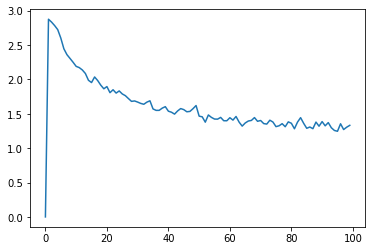

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(loss_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


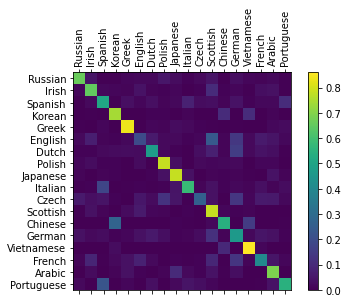

In [43]:
no_of_languages=len(name_folders)
confusion = torch.zeros(no_of_languages, no_of_languages)
n_confusion = 10000

def evaluate(line_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    
    return output

for i in range(n_confusion):
    category, line, category_tensor, line_tensor = random_training_pair()
    output = evaluate(line_tensor)
    guess, guess_i = category_from_output(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

for i in range(no_of_languages):
    confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [48]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    output = evaluate(Variable(line_to_tensor(input_line)))

    topv, topi = output.data.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
        value = topv[0][i]
        category_index = topi[0][i]
        print('(%.2f) %s' % (value, all_categories[category_index]))
        predictions.append([value, all_categories[category_index]])

predict('Yasuo')


> Yasuo
(-0.33) Arabic
(-2.28) Portuguese
(-3.34) Japanese


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
